In [1]:
__nbid__ = '0069'
__author__  = 'Ryan M. Lau <ryan.lau@noirlab.edu>, Kishalay De <kde1@mit.edu>, Alice Jacques <alice.jacques@noirlab.edu>, David Herrera <david.herrera@noirlab.edu>, Data Lab Team <datalab@noirlab.edu>'
__version__ = '20251205' # aaaammdd
__datasets__ = ['pgir_dr1']
__keywords__ = ['lightcurve', 'photometry', 'time domain', 'Lomb-Scargle']

## Curvas de luz en banda J del catálogo Palomar Gattini-IR DR1

*Ryan M. Lau (NSF NOIRLab), Kishalay De (MIT), Shion Murakawa (MIT), Alice Jacques (NSF NOIRLab/CSDC) y equipo de Astro Data Lab*

#### (_Traducción de [PGIR_DR1_light_curves.ipynb](https://github.com/astro-datalab/notebooks-latest/blob/master/03_ScienceExamples/PGIRLightCurves/PGIR_DR1_light_curves.ipynb)_)

### Tabla de contenido
* [Objetivos y resumen del notebook](#goals)
* [Avisos Legales y atribuciones](#attribution)
* [Autenticación](#auth)
* [Importaciones y configuración](#import)
* [Ingrese coordenadas de búsqueda y genere curva de luz](#lightcurve)
* [Análisis del periodograma de Lomb-Scargle](#lombscargle)
* [Recursos y referencias](#resources)

<a class="anchor" id="goals"></a>

# Objetivos y resumen del notebook
El objetivo de este notebook es demostrar cómo generar curvas de luz a partir del catálogo **Palomar Gattini-IR (PGIR) Data Release 1 (DR1)** de curvas de luz infrarroja en banda J y también realizar un análisis básico del periodograma Lomb-Scargle para identificar un período.

**Descripción de Palomar Gattini-IR:** PGIR es un estudio robótico de campo amplio en el dominio del tiempo en el infrarrojo cercano que cubre todo el cielo nocturno visible al norte de la declinación -28,5 con una cadencia media de 2 noches. El survey opera en un solo filtro (banda J, calibrado según el sistema 2MASS), con un campo de visión de exposición única de 25 grados cuadrados y una escala de píxeles nativa de 8,7 segundos de arco/píxel. Se pueden encontrar más detalles sobre el instrumento y el sistema de reducción de datos en [De et al. (2020)](https://ui.adsabs.harvard.edu/abs/2020PASP..132b5001D/abstract). Las curvas de luz se extraen realizando fotometría de función de dispersión puntual (Point Spread Function or PSF) en las imágenes apiladas de cada visita de campo, con la huella de observación completa dividida en 1329 campos. La primera publicación de datos contiene curvas de luz de banda J de aproximadamente 286 millones de fuentes del catálogo 2MASS, con un total de aproximadamente 50 mil millones de mediciones fotométricas [(Murakawa et al. 2024)](https://ui.adsabs.harvard.edu/abs/2024arXiv240601720M/abstract).

**Ejemplo científico:** El objetivo científico de este notebook es el enigmático sistema NaSt1 (también conocido como LS IV +005 y WR 122), que se cree que es un sistema Wolf-Rayet de tipo temprano envuelto en una nebulosa densa. Demostraremos cómo se pueden utilizar las curvas de luz PGIR para identificar la variabilidad periódica de este sistema, que fue presentado por [(Lau et al. 2021)](https://ui.adsabs.harvard.edu/abs/2021ApJ...922....5L/abstract).

<a class="anchor" id="attribution"></a>
# Avisos Legales y atribuciones

Avisos Legales
-----------
Tome en cuenta que usar el Astro Data Lab constituye un acuerdo con nuestros [Avisos Legales](https://datalab.noirlab.edu/disclaimers.php) mínimos.

Reconocimientos
---------------
Si ud. usa el **Astro Data Lab** en sus publicaciones de investigación, por favor incluya el siguiente texto en la sección de Reconocimientos de su publicaciones:

_Esta investigación utiliza servicios de datos proveeidos por el Astro Data Lab, el cual es parte del Programa "Community Science and Data Center" (CSDC) (Centro de Ciencia Comunitaria y Datos) del NSF NOIRLab. NOIRLab es operado por la "Association of Universities for Research in Astronomy (AURA), Inc."(Asociación de Universidaddes para la Investigación en Astronomía, Inc.), bajo un acuerdo de cooperación con la "U.S. National Science Foundation" (Fundación Nacional de Ciencia de los EE. UU.)._

Si utiliza **SPARCL junto con la plataforma de Astro Data Lab** (por medio de JupyterLab, línea de comando o interfaz de la web) en su publicación de investigación, por favor incluya el siguiente texto en la sección de Reconocimientos de su publicaciones:

_Esta investigación utiliza servicios o datos proporcionados por el "SPectra Analysis and Retrievable Catalog Lab" (SPARCL) (Laboratorio de Análisis y Catálogo Recuperable de Espectros) y el Astro Data Lab, ambos pertenecientes al Programa "Community Science and Data Center" (CSDC) (Centro de Ciencia Comunitaria y Datos) de NSF NOIRLab. NOIRLab es operado por la "Association of Universities for Research in Astronomy (AURA), Inc." (Asociación de Universidades para la Investigación en Astronomía, Inc.), bajo un acuerdo de cooperación con la "U.S. National Science Foundation" (Fundación Nacional de Ciencia de los EE. UU.)._

En cualquiera de los casos, **por favor cite las siguientes publicaciones**:

* Publicación del concepto de Data Lab: Fitzpatrick et al., "The NOAO Data Laboratory: a conceptual overview", SPIE, 9149, 2014, https://doi.org/10.1117/12.2057445

* Descripción general del Astro Data Lab: Nikutta et al., "Data Lab - A Community Science Platform", Astronomy and Computing, 33, 2020, https://doi.org/10.1016/j.ascom.2020.100411.

Si hace referencia al Jupyterlab / Jupyter notebooks de Data Lab, cite:

* Juneau et al., "Jupyter-Enabled Astrophysical Analysis Using Data-Proximate Computing Platforms", CiSE, 23, 15, 2021, https://doi.org/10.1109/MCSE.2021.3057097.

Si publica en una revista de la AAS, agregue también la palabra clave `\facility{Astro Data Lab}`

Y si está usando SPARCL, por vor agregue también `\software{SPARCL}` y cite:

* Juneau et al., "SPARCL: SPectra Analysis and Retrievable Catalog Lab", Conference Proceedings for ADASS XXXIII, 2024
https://doi.org/10.48550/arXiv.2401.05576.

La biblioteca de NOIRLab mantiene [listas de reconocimientos apropiados](https://noirlab.edu/science/about/scientific-acknowledgments) para usar cuando se hacen publicaciones utilizando los recursos, servicios o datos del Laboratorio.

---- **Versión en Inglés** ----


# Disclaimer & attribution

Disclaimers
-----------
Note that using the Astro Data Lab constitutes your agreement with our minimal [Disclaimers](https://datalab.noirlab.edu/disclaimers.php).

Acknowledgments
---------------
If you use **Astro Data Lab** in your published research, please include the text in your paper's Acknowledgments section:

_This research uses services or data provided by the Astro Data Lab, which is part of the Community Science and Data Center (CSDC) Program of NSF NOIRLab. NOIRLab is operated by the Association of Universities for Research in Astronomy (AURA), Inc. under a cooperative agreement with the U.S. National Science Foundation._

If you use **SPARCL jointly with the Astro Data Lab platform** (via JupyterLab, command-line, or web interface) in your published research, please include this text below in your paper's Acknowledgments section:

_This research uses services or data provided by the SPectra Analysis and Retrievable Catalog Lab (SPARCL) and the Astro Data Lab, which are both part of the Community Science and Data Center (CSDC) Program of NSF NOIRLab. NOIRLab is operated by the Association of Universities for Research in Astronomy (AURA), Inc. under a cooperative agreement with the U.S. National Science Foundation._

In either case **please cite the following papers**:

* Data Lab concept paper: Fitzpatrick et al., "The NOAO Data Laboratory: a conceptual overview", SPIE, 9149, 2014, https://doi.org/10.1117/12.2057445

* Astro Data Lab overview: Nikutta et al., "Data Lab - A Community Science Platform", Astronomy and Computing, 33, 2020, https://doi.org/10.1016/j.ascom.2020.100411

If you are referring to the Data Lab JupyterLab / Jupyter Notebooks, cite:

* Juneau et al., "Jupyter-Enabled Astrophysical Analysis Using Data-Proximate Computing Platforms", CiSE, 23, 15, 2021, https://doi.org/10.1109/MCSE.2021.3057097

If publishing in a AAS journal, also add the keyword: `\facility{Astro Data Lab}`

And if you are using SPARCL, please also add `\software{SPARCL}` and cite:

* Juneau et al., "SPARCL: SPectra Analysis and Retrievable Catalog Lab", Conference Proceedings for ADASS XXXIII, 2024
https://doi.org/10.48550/arXiv.2401.05576

The NOIRLab Library maintains [lists of proper acknowledgments](https://noirlab.edu/science/about/scientific-acknowledgments) to use when publishing papers using the Lab's facilities, data, or services.


<a class="anchor" id="import"></a>
# Importaciones y configuración

Importando los módulos básicos de Python, la función `LombScargle` de astropy y `authClient` y `queryClient` de Astro Data Lab.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import astropy.units as u
from astropy.timeseries import LombScargle
from getpass import getpass

from dl import authClient as ac, queryClient as qc

<a class="anchor" id="auth"></a>
# Autenticación
Se puede acceder a gran parte de la funcionalidad de Data Lab sin iniciar sesión explícitamente (el servicio utiliza un inicio de sesión anónimo). Sin embargo, algunas funciones, como guardar los resultados de las consultas en el espacio de almacenamiento virtual, requieren iniciar sesión (es decir, necesitará una cuenta de usuario registrada).

Si necesita iniciar sesión en Data Lab, descomente la celda a continuación y ejecútela:

In [ ]:
#token = ac.login(input("Ingrese su nombre de usuario: (+ENTER) "),getpass("Ingrese su contraseña:: (+ENTER) "))
#ac.whoAmI()

<a class="anchor" id="lightcurve"></a>
# Ingresar las coordenadas de búsqueda y generar una curva de luz.

### Ingresar AR y Dec (en grados) de un objeto y el radio de búsqueda del cono
Como ejemplo para demostrar la utilidad de PGIR DR1, investigaremos la variabilidad de IR del sistema estelar masivo fuertemente envuelto NaSt1 / WR122 [(Lau et al. 2021)](https://ui.adsabs.harvard.edu/abs/2021ApJ...922....5L/abstract). Usaremos un radio de búsqueda de cono de 0,01 grados para demostrar cómo se manejan las búsquedas cuando se identifican múltiples fuentes 2MASS.

In [3]:
# Coordenadas de NaSt1
ra = 283.07312
dec = 0.99564

search_rad = 0.01 # radio de búsqueda en grados

### PGIR DR1 está compuesto por las tres tablas siguientes:

`exposiciones` - Metadatos de cada exposición incluida en el catálogo

`fotometría` - Medidas fotométricas individuales para cada fuente del catálogo

`fuentes` - Metadatos y momentos estadísticos de fotometría para cada fuente 2MASS

Las columnas y descripciones de cada tabla se pueden encontrar en la Tabla 1 de [Murakawa et al. (2024)](https://ui.adsabs.harvard.edu/abs/2024arXiv240601720M/abstract) y el [explorador de tablas PGIR DR1](https://datalab.noirlab.edu/query.php?name=pgir_dr1.sources) en Astro Data Lab.

Realizaremos nuestra búsqueda de coordenadas en la tabla de "fuentes" para identificar las fuentes de 2MASS que se encuentran dentro de nuestras coordenadas. Usando una combinación de tabla en el ID único de 2MASS (`pts_key`) de la tabla `sources`, podemos obtener la fotometría PGIR de cada fuente 2MASS de la tabla `photometry`. Nuestra tabla de resultados proporcionará lo siguiente:

`tmcra` - Ascensión recta de la fuente 2MASS

`tmcdec` - Declinación 2MASS de la fuente

`obsjd` - Fecha juliana de inicio de exposición

`pts_key` - Número de identificación 2MASS de la fuente

`magpsf` - Magnitud de la banda J de exposición PGIR de la fuente

`magpsferr` - Error de magnitud del ruido de la imagen de la exposición PGIR de la fuente

`magpsfstaterr` - Error de magnitud estadística de la exposición PGIR de la fuente

`flags` - Valor de bits de las banderas de exposición de la fuente

In [4]:
q = f"""SELECT S.pts_key, S.tmcra, S.tmcdec, P.obsjd, P.magpsf, P.magpsferr, P.magpsfstaterr, P.flags
FROM pgir_dr1.sources as S
JOIN pgir_dr1.photometry as P on S.pts_key = P.pts_key
WHERE q3c_radial_query(S.tmcra, S.tmcdec, {ra}, {dec}, {search_rad})
"""
re = qc.query(sql=q, fmt='pandas')

print('%i unique 2MASS sources found' % len(np.unique(re['pts_key'])))

17 unique 2MASS sources found


La búsqueda ha identificado 17 fuentes únicas de 2MASS a partir de la búsqueda:

In [5]:
np.unique(re['pts_key'])

array([673172927, 673172931, 673172956, 673172967, 673173015, 673173034,
       673173036, 673173040, 673173065, 673173067, 673173083, 673173090,
       673173119, 673173147, 673173151, 673173181, 673173185])

La siguiente celda identifica la fuente más cercana en función de su proximidad a las coordenadas de búsqueda y define una nueva tabla de curva de luz de esa fuente más cercana.

In [6]:
re['dist'] = np.sqrt((ra-re['tmcra'])**2+(dec-re['tmcdec'])**2)
re = re.sort_values('dist')
re = re.reset_index(drop=True)

re_best = re[re['pts_key']==re['pts_key'][0]]
re_best

,pts_key,tmcra,tmcdec,obsjd,magpsf,magpsferr,magpsfstaterr,flags,dist
0,673173034,283.07312,0.995639,2459867.8,9.885060,5.506587e-02,0.003874,32,1.000000e-06
1,673173034,283.07312,0.995639,2459722.8,9.639231,5.945242e-02,0.003415,33,1.000000e-06
2,673173034,283.07312,0.995639,2459721.8,9.656757,6.217199e-02,0.003503,33,1.000000e-06
3,673173034,283.07312,0.995639,2459719.8,9.629660,4.645084e-02,0.003359,33,1.000000e-06
4,673173034,283.07312,0.995639,2459717.8,9.679220,5.606063e-02,0.003443,33,1.000000e-06
...,...,...,...,...,...,...,...,...,...
1605,673173034,283.07312,0.995639,2459375.8,9.688159,6.854054e-02,0.003479,33,1.000000e-06
1606,673173034,283.07312,0.995639,2459374.8,9.918835,7.887600e-02,0.004528,33,1.000000e-06
1607,673173034,283.07312,0.995639,2459386.8,10.392316,1.221390e-01,0.004804,33,1.000000e-06
1608,673173034,283.07312,0.995639,2458425.5,29.796688,9.745351e+06,NaN,36,1.000000e-06


Para filtrar detecciones espurias, aplicamos un umbral de relación señal-ruido (SNR) utilizando tanto el error de magnitud estadístico (`magpsfstaterr`) como el error de magnitud muestreado (`magpsferr`). Los errores negativos también se filtran.

In [7]:
snr_thresh = 10

positive_err = ((re_best['magpsferr'] > 0) &
                (re_best['magpsfstaterr'] > 0) & 
                (1 / re_best['magpsfstaterr'] > snr_thresh) &
                (1 / re_best['magpsferr'] > snr_thresh))

re_best = re_best[positive_err]

La siguiente celda lee las banderas de calidad para cada época. Descomente las banderas que desea aplicar a sus datos. En este notebook, no utilizaremos las banderas.

Tenga en cuenta que NaSt1 tiene fuentes cercanas que provocan contaminación de apertura, lo que provocará que muchas de las épocas tengan el indicador de contaminación de apertura (F6). Sin embargo, como sólo nos interesa la variabilidad, la contaminación no es un problema importante.

In [8]:
flags = re_best['flags']
procflags = []
for flagval in flags:
    totflag = True
    if flagval - 32 >= 0:
        # totflag = False # eliminar mediciones con contaminación de apertura (F6).
        flagval -= 32
    if flagval - 16 >= 0:
        # totflag = False # elimina mediciones con desviación de punto cero (F5).
        flagval -= 16
    if flagval - 8 >= 0:
        # totflag = False # elimina mediciones con mala masa de aire (F4).
        flagval -= 8
    if flagval - 4 >= 0:
        # totflag = False # elimina mediciones con magnitudes fuera de lo recomendado (F3).
        flagval -= 4
    if flagval - 2 >= 0:
        # totflag = False # elimina medidas con saturación de píxeles (F2).
        flagval -= 2
    if flagval - 1 >= 0:
        # totflag = False # elimina medidas en el lado del meridiano oeste (F1).
        flagval -= 1
    procflags.append(totflag)

### Graficado de la curva de luz de banda J PGIR

Ahora podemos graficar la curva de luz de banda J PGIR de nuestro objetivo (NaSt1; `pts_key = 673173034`) con la fotometría que ha superado nuestro umbral de SNR y las banderas que configuramos en la celda anterior.

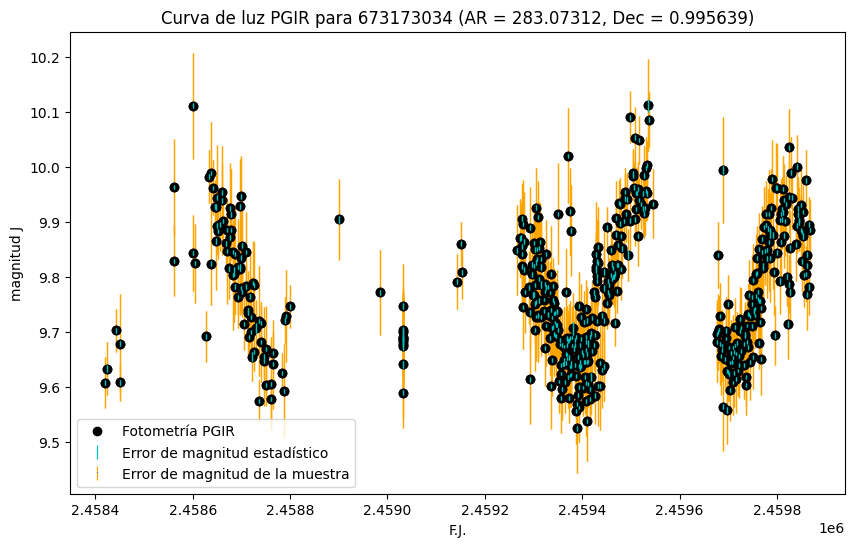

In [11]:
plt.figure(figsize=(10,6))

plt.errorbar(re_best[procflags]['obsjd'], re_best[procflags]['magpsf'],
             fmt='o', color='k', ms=6, ls='', zorder=10, label='Fotometría PGIR')

plt.errorbar(re_best[procflags]['obsjd'], re_best[procflags]['magpsf'],
             yerr = re_best[procflags]['magpsfstaterr'],
             fmt=',', color='none', ms=6, zorder=20, elinewidth=0.9, ecolor='c',
             label='Error de magnitud estadístico')

plt.errorbar(re_best[procflags]['obsjd'], re_best[procflags]['magpsf'],
             yerr = re_best[procflags]['magpsferr'],
             fmt=',', ms=6, zorder=0, elinewidth=0.9, ecolor='orange',
             label='Error de magnitud de la muestra')

plt.xlabel('F.J.')
plt.ylabel('magnitud J')
plt.title(f"Curva de luz PGIR para {re_best['pts_key'][0]} (AR = {re_best['tmcra'][0]}, Dec = {re_best['tmcdec'][0]})") 
plt.legend()
plt.show()

<a class="anchor" id="lombscargle"></a>
# Análisis del periodograma de Lomb-Scargle

La curva de luz de NaSt1 parece exhibir variabilidad periódica. Aquí, realizamos un análisis de periodograma de Lomb-Scargle para verificar el período y compararlo con los resultados de [(Lau et al. 2021)](https://ui.adsabs.harvard.edu/abs/2021ApJ...922....5L/abstract).

Para el análisis del periodograma, ejecutamos la función "LombScargle" para buscar períodos entre 3 y 500 días a partir de la curva de luz de banda J PGIR de NaSt1.

In [12]:
min_period = 3.0 * u.day
max_period = 500 * u.day

min_freq_search = 1.0 / max_period
max_freq_search = 1.0 / min_period

frequency, power = LombScargle(np.array(re_best[procflags]['obsjd']) * u.day,
                               re_best[procflags]['magpsf']).autopower(minimum_frequency=min_freq_search,
                                                                       maximum_frequency=max_freq_search)

freq_peak = frequency[np.argmax(power)].value

print('El período correspondiente a la frecuencia máxima es %.1f d' % (1 / freq_peak))

El período correspondiente a la frecuencia máxima es 308.3 d


A continuación, graficamos los periodogramas de Lomb-Scargle en función de la frecuencia y el período.

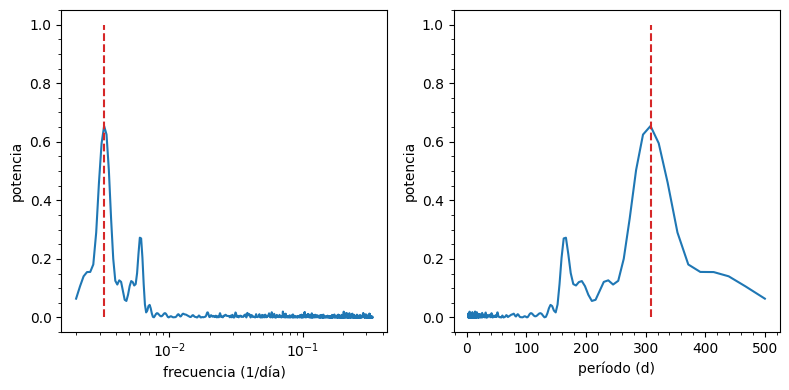

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

plt.sca(ax[0])
plt.plot(frequency, power)
plt.vlines(freq_peak, 0, 1, linestyle='--', color='tab:red')
plt.minorticks_on()
plt.xlabel('frecuencia (1/día)')
plt.xscale('log')
plt.ylabel('potencia')

plt.sca(ax[1])
plt.plot(1 / frequency, power)
plt.vlines(1 / freq_peak, 0, 1, linestyle='--', color='tab:red')
plt.minorticks_on()
plt.xlabel('período (d)')
plt.ylabel('potencia')

plt.tight_layout()
plt.show()

De hecho, el pico más fuerte en el periodograma corresponde a un período de 308 días, lo que es consistente con el período de variabilidad derivado para NaSt1 por [(Lau et al. 2021)](https://ui.adsabs.harvard.edu/abs/2021ApJ...922....5L/abstract).

<a class="anchor" id="resources"></a>
# Recursos y referencias

De et al. (2020): *Palomar Gattini-IR: Survey Overview, Data Processing System, On-sky Performance and First Results*. Publications of the Astronomical Society of the Pacific, 132, 025001: https://ui.adsabs.harvard.edu/abs/2020PASP..132b5001D/abstract

Lau et al. (2021): *Discovery of a 310 Day Period from the Enshrouded Massive System NaSt1 (WR 122)*. The Astrophysical Journal, 922, 5: https://ui.adsabs.harvard.edu/abs/2021ApJ...922....5L/abstract

Murakawa et al. (2024): *The first Palomar Gattini-IR catalog of J-band light curves: construction and public data release*.  
arXiv:2406.01720: https://ui.adsabs.harvard.edu/abs/2024arXiv240601720M/abstract